In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# 1. Load dataset
df = pd.read_csv("diabetes.csv")

In [3]:
# 2. Replace 0 values with NaN for selected columns
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [4]:
# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

# 3. Split features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [5]:
# 4. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 6. Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.1)
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)

# 7. Train logistic regression on transformed data
model = LogisticRegression()
model.fit(X_train_kpca, y_train)
y_pred = model.predict(X_test_kpca)

Accuracy after Kernel PCA: 0.6428571428571429


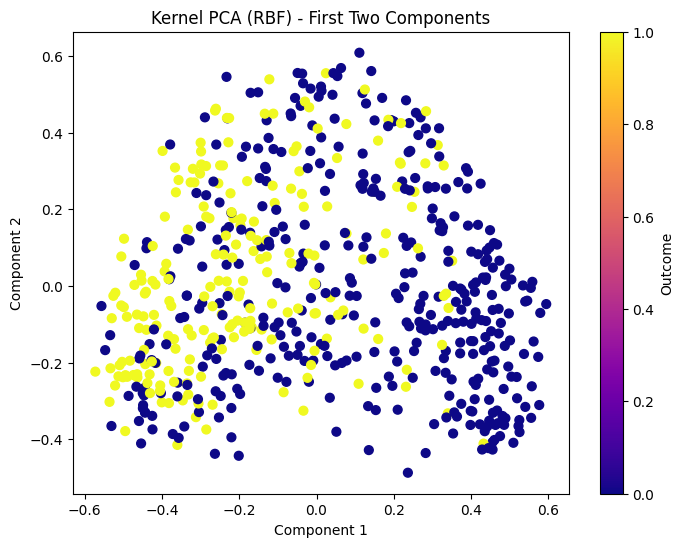

In [8]:
# 8. Evaluate the model
print("Accuracy after Kernel PCA:", accuracy_score(y_test, y_pred))

# 9. Visualize first two Kernel PCA components
plt.figure(figsize=(8,6))
plt.scatter(X_train_kpca[:,0], X_train_kpca[:,1], c=y_train, cmap="plasma", s=40)
plt.title("Kernel PCA (RBF) - First Two Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Outcome")
plt.show()